In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<h3> Задача №5.1

In [4]:
#Построение симметричного случайного блуждания
#Параметр walk:
# 'sym' - простое симметрические случайное блуждание Bern(0.5) {+-1}
# 'norm' - каждый шаг N(0, 1) - случ. величина 
def random_walk(n, walk='sym'):
    S = list()
    S.append(0)
       
    for i in range(n):
        
        if walk=='sym':
            move = -1 if np.random.rand(1)[0] < 0.5 else 1
        
        if walk=='norm':
            move = stats.norm.rvs(size=1)[0]
        
        value = S[-1] + move
        S.append(value)
    return np.array(S)

In [5]:
def last_zero(S):
    for i in range(len(S)-1, -1, -1):
        if S[i] == 0:
            return i

In [6]:
#Длина случайного блуждания - n
def zeros(n, accuracy):
    lzeros = list()
    for i in range(accuracy):
        lzeros.append(last_zero(random_walk(n))/n)
    return np.array(lzeros)

<h4> Пункт a)

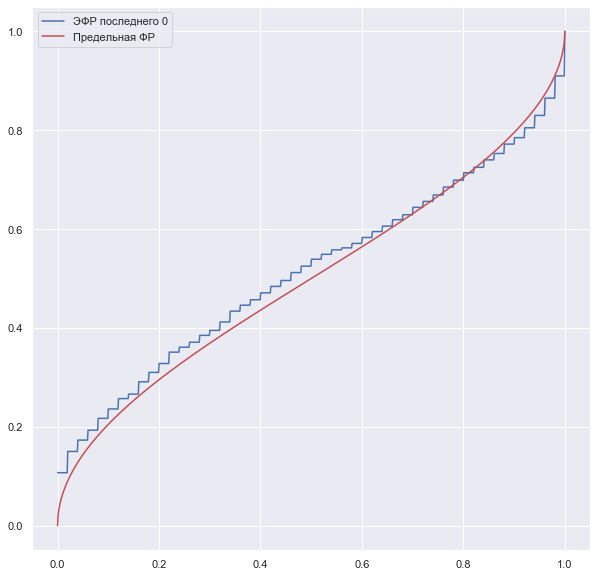

In [7]:
domain = np.linspace(0, 1, 1000)
lzeros = np.array([zeros(100, 1000)])


fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(domain, [lzeros[lzeros <= domain[i]].size / lzeros.size for i in range(1000)], label='ЭФР последнего 0')
ax.plot(domain, (2/np.pi)*np.arcsin(np.sqrt(domain)), '-r', label='Предельная ФР')

ax.legend()
plt.show()

<h4> Пункт б)

In [8]:
def positive_time(S):
    return np.sum(S > 0)

In [9]:
def positive(n, accuracy):
    pos = list()
    for i in range(accuracy):
        pos.append(positive_time(random_walk(n))/n)
    return np.array(pos)

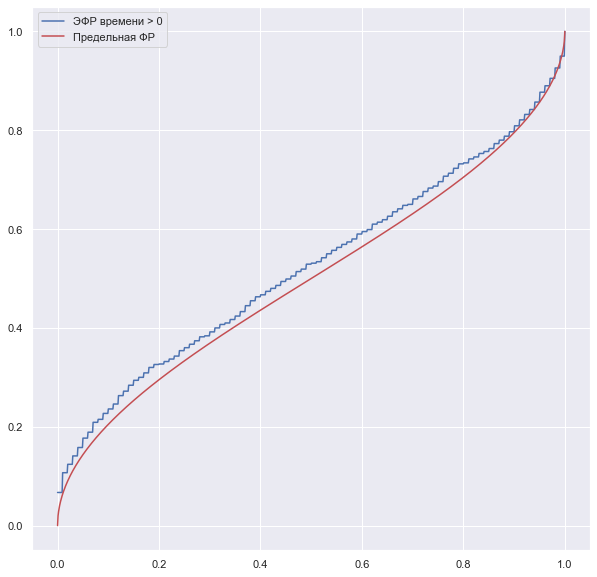

In [10]:
accuracy = 1000
domain = np.linspace(0, 1, accuracy)
pos_time = positive(100, accuracy)

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(domain, [pos_time[pos_time <= domain[i]].size / pos_time.size for i in range(accuracy)], label='ЭФР времени > 0')
ax.plot(domain, (2/np.pi)*np.arcsin(np.sqrt(domain)), '-r', label='Предельная ФР')

ax.legend()
plt.show()

<h4> Задача №5.2

In [11]:
# n - длина случайного блуждания 
# tr - количество траекторий
# walk - тип 'sym' или 'norm', default : 'sym'
def illustrate(n, tr, walk='sym'):
    
    domain = np.linspace(np.e, n, n+1)
    fig, ax = plt.subplots(figsize=(20, 10))
    
    ax.plot(domain, np.sqrt(2*domain*np.log(np.log(domain))), '-b')
    ax.plot(domain, -np.sqrt(2*domain*np.log(np.log(domain))), '-b')
    ax.set_xlabel('n')
    ax.set_ylabel('S(n)')
    ax.set_title('Траектории случайного блуждания ' + walk)
    
    for i in range(tr):
        ax.plot(domain, random_walk(n, walk))
    
    plt.show()

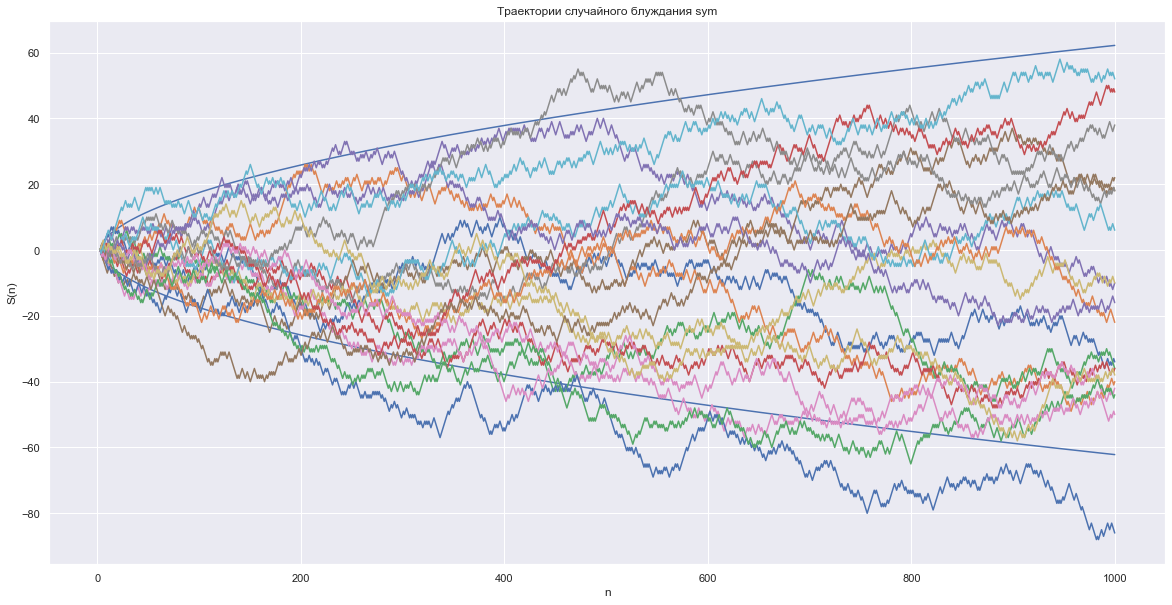

In [12]:
illustrate(1000, 20, 'sym')

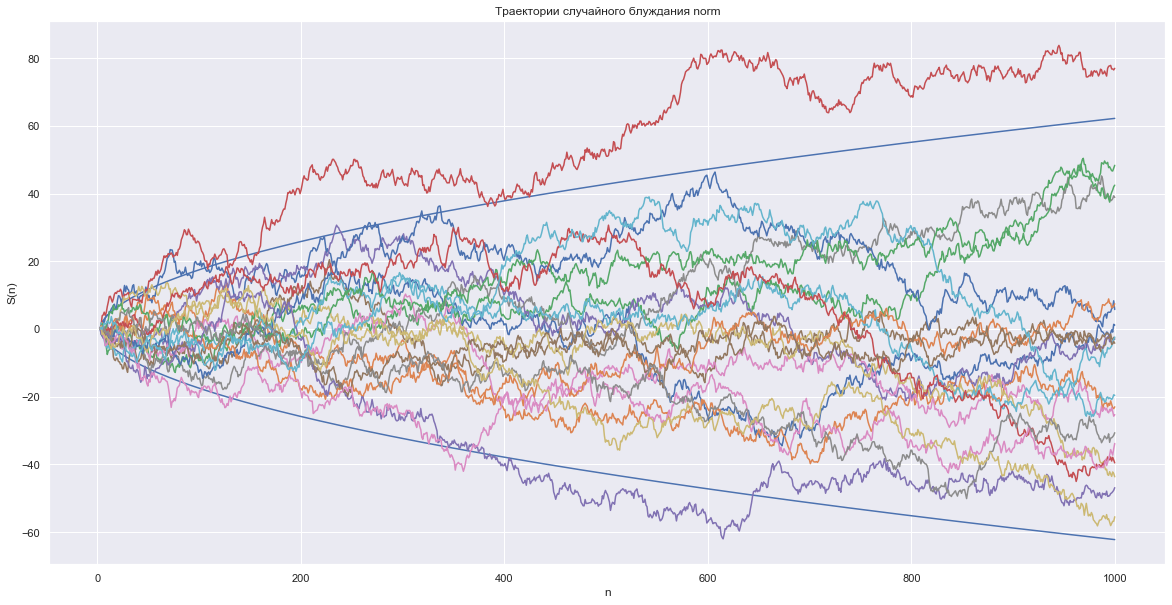

In [13]:
illustrate(1000, 20, 'norm')

<h4> Задача №5.3 

In [62]:
def bankrupt(start, finish, p, n):
    result = list()
    time_avrg = list()
    for i in range(n):
        S = list()
        S.append(start)

        while (S[-1] != finish) and (S[-1] != 0):
            
            move = -1 if np.random.rand(1)[0] < (1 - p) else 1
            value = S[-1] + move
            S.append(value)
        if S[-1] == 0:
            # 1 - значит, что разорился, 0 - нет
            # тогда и время определено
            result.append(1)
            time_avrg.append(len(S) - 1)
        else:
            result.append(0)
            time_avrg.append(len(S) - 1)
    if p != 0.5:
        if (p < 0.5) & (finish > 300):
            r = 1
        else: 
            r = (((1-p)/p)**finish - ((1-p)/p)**start)/((((1-p)/p)**finish) - 1)
    print('Эмпирическая вероятность разорения при p = ' + str(p) + ' A = ' + str(start) + ' B = ' + str(finish) + ':', sum(result)/n)
    print('Теоретическая вероятность: ', (1 - start/finish) if p == 0.5 else r)
    
    print('Среднее время до разорения одного игрока:', np.mean(time_avrg))
    
    print('Теоретическое время разорения:', start*(finish - start) if p == 0.5 else (-start*r + (finish-start)*(1 - r))/(2*p - 1))

<h3> 1) p = 0.1

<h4>A = 100, B = 150

In [63]:
bankrupt(100, 150, 0.1, 1000)

Эмпирическая вероятность разорения при p = 0.1 A = 100 B = 150: 1.0
Теоретическая вероятность:  1.0
Среднее время до разорения одного игрока: 124.918
Теоретическое время разорения: 125.0


<h4>A = 100, B = 200

In [64]:
bankrupt(100, 200, 0.1, 1000)

Эмпирическая вероятность разорения при p = 0.1 A = 100 B = 200: 1.0
Теоретическая вероятность:  1.0
Среднее время до разорения одного игрока: 125.162
Теоретическое время разорения: 125.0


<h4>A = 100, B = 1000

In [65]:
bankrupt(100, 1000, 0.1, 1000)

Эмпирическая вероятность разорения при p = 0.1 A = 100 B = 1000: 1.0
Теоретическая вероятность:  1
Среднее время до разорения одного игрока: 124.962
Теоретическое время разорения: 125.0


<h3> 2) p = 0.5

<h4>A = 100, B = 150

In [66]:
bankrupt(100, 150, 0.5, 1000)

Эмпирическая вероятность разорения при p = 0.5 A = 100 B = 150: 0.334
Теоретическая вероятность:  0.33333333333333337
Среднее время до разорения одного игрока: 5031.148
Теоретическое время разорения: 5000


<h4>A = 100, B = 200

In [67]:
bankrupt(100, 200, 0.5, 1000)

Эмпирическая вероятность разорения при p = 0.5 A = 100 B = 200: 0.515
Теоретическая вероятность:  0.5
Среднее время до разорения одного игрока: 10001.176
Теоретическое время разорения: 10000


<h4>A = 100, B = 1000

In [68]:
bankrupt(100, 1000, 0.5, 1000)

Эмпирическая вероятность разорения при p = 0.5 A = 100 B = 1000: 0.922
Теоретическая вероятность:  0.9
Среднее время до разорения одного игрока: 86362.172
Теоретическое время разорения: 90000


<h3> 3) p = 0.9

<h4>A = 100, B = 150

In [75]:
bankrupt(100, 150, 0.9, 1000)

Эмпирическая вероятность разорения при p = 0.9 A = 100 B = 150: 0.0
Теоретическая вероятность:  3.764861949598912e-96
Среднее время до разорения одного игрока: 62.136
Теоретическое время разорения: 62.5


<h4>A = 100, B = 200

In [76]:
bankrupt(100, 200, 0.9, 1000)

Эмпирическая вероятность разорения при p = 0.9 A = 100 B = 200: 0.0
Теоретическая вероятность:  3.764861949598912e-96
Среднее время до разорения одного игрока: 124.848
Теоретическое время разорения: 125.0


<h4>A = 100, B = 1000

In [77]:
bankrupt(100, 1000, 0.9, 1000)

Эмпирическая вероятность разорения при p = 0.9 A = 100 B = 1000: 0.0
Теоретическая вероятность:  3.764861949598912e-96
Среднее время до разорения одного игрока: 1124.172
Теоретическое время разорения: 1125.0
